# Telecommunication Churn Prediction¶
### Problem Statement - Given various features about a customer like Gender, SeniorCitizen, Partner, Dependents etc.. , predict if the customer will churn or not.

# Import the Libraries

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#  Load and Clean the Data

In [2]:
df = pd.read_csv(r"\Users\LENOVO\Downloads\churn_dataset.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
del df['customerID']

In [7]:
df['TotalCharges']=df['TotalCharges'].apply(lambda x : x.replace(" ",'0'))

In [8]:
df[['TotalCharges']]=df[['TotalCharges']].apply(pd.to_numeric)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [10]:
df.shape

(7043, 20)

In [11]:
df['SeniorCitizen']

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: int64

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# Data Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


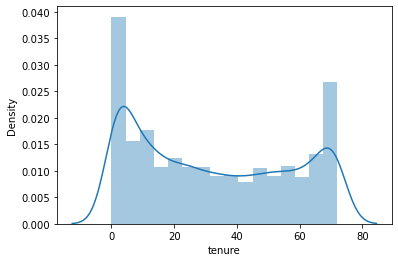

In [13]:
#distributionplot
sns.distplot(df.tenure)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


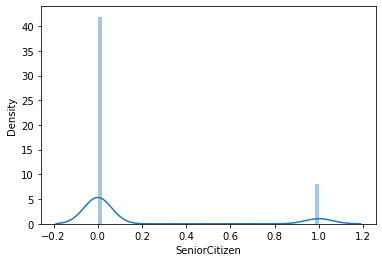

In [14]:
sns.distplot(df.SeniorCitizen)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


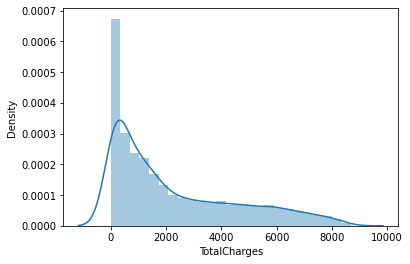

In [15]:
sns.distplot(df.TotalCharges)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


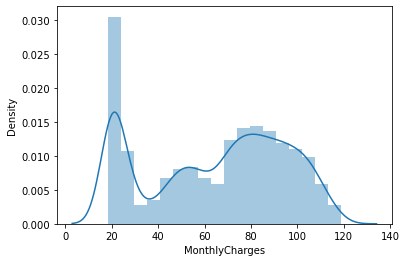

In [16]:
sns.distplot(df.MonthlyCharges)
plt.show()

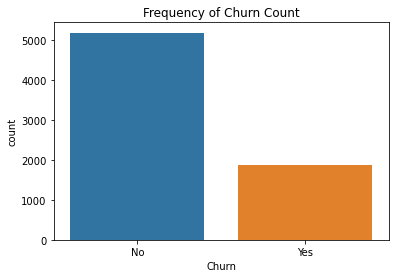

In [17]:
# Count plot
sns.countplot(x='Churn',data=df)
plt.title("Frequency of Churn Count")
plt.show()

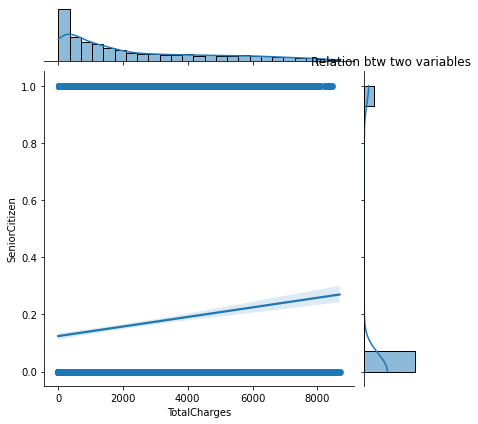

In [18]:
#JointPlot
sns.jointplot(x='TotalCharges',y='SeniorCitizen',data=df,kind='reg')
plt.title("Relation btw two variables")
plt.show()

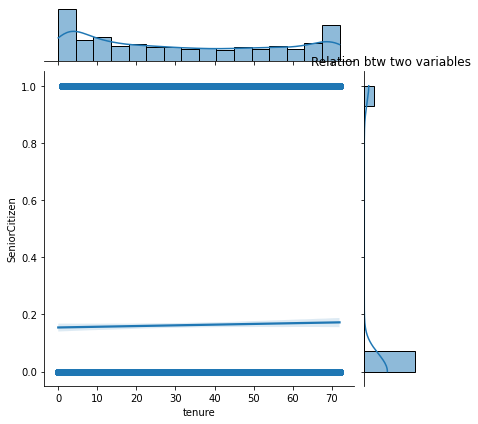

In [19]:
sns.jointplot(x='tenure',y='SeniorCitizen',data=df,kind='reg')
plt.title("Relation btw two variables")
plt.show()

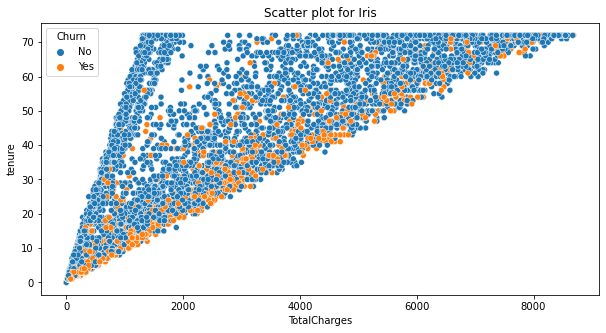

In [20]:
#ScatterPlot
plt.figure(figsize=(10,5))
sns.scatterplot(x='TotalCharges',y='tenure',data=df,hue='Churn')
plt.title("Scatter plot for Iris")
plt.show()

<AxesSubplot:>

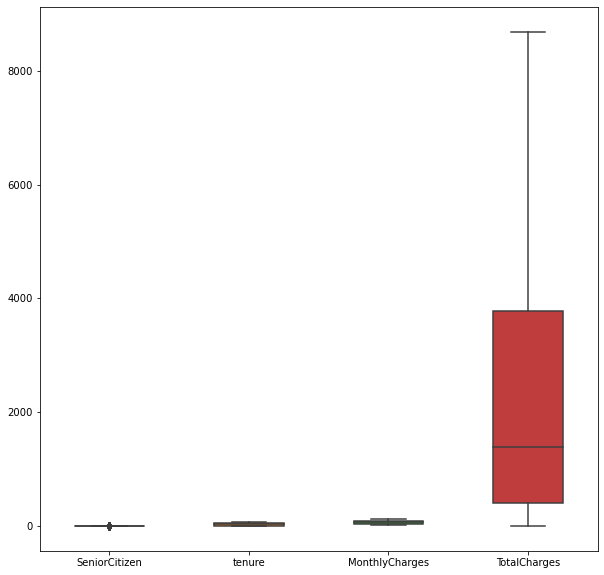

In [21]:
plt.figure(figsize=(10,10))
box_data = df #variable representing the data array
box_target = df.Churn #variable representing the labels array
sns.boxplot(data = box_data,width=0.5,fliersize=5)

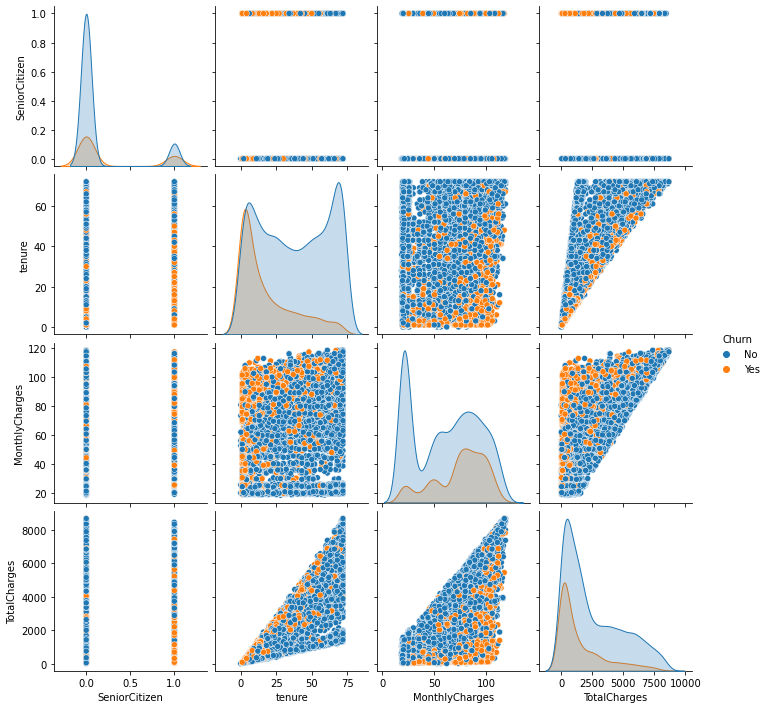

In [22]:
sns.pairplot(df,hue='Churn') #PAIR PLOT IS USED ONLY TO THE FEW NUMERICALS VALUES ARE TO BE ANALYSED
plt.show()

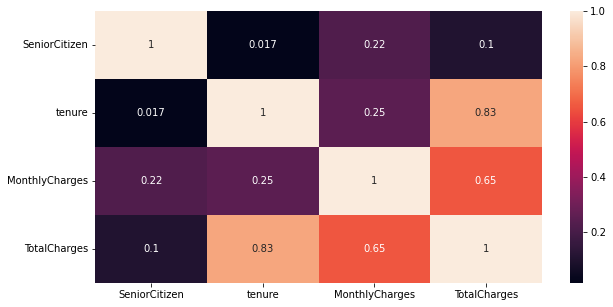

In [23]:
#Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Machine Learning Problem

In [24]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [25]:
df=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']]

In [26]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Preparation

###  Identify the Target Variable and Splitting the Data into Train and Test

In [27]:
# Identifying the inputs (X) and output (y)
y = df['Churn']   #Target Variable

X = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges',]]

In [28]:
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [29]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [30]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)

In [31]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(5282, 19) (5282,)
(1761, 19) (1761,)


In [32]:
#Separating Categorical and Numerical Columns
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6630,Male,1,No,No,16,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,78.75,1218.25
7013,Female,0,No,No,40,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),93.40,3756.40
2224,Male,1,Yes,No,17,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,76.45,1233.40
6580,Female,0,Yes,Yes,49,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,One year,No,Credit card (automatic),78.00,3824.20
1501,Male,0,No,No,13,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.95,243.65


In [33]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
6630,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check
7013,Female,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic)
2224,Male,Yes,No,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
6580,Female,Yes,Yes,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,One year,No,Credit card (automatic)
1501,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check


In [34]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
6630,1,16,78.75,1218.25
7013,0,40,93.40,3756.40
2224,1,17,76.45,1233.40
6580,0,49,78.00,3824.20
1501,0,13,19.95,243.65


In [35]:
#Scaling the Numerical Features
X_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
6630,1,16,78.75,1218.25
7013,0,40,93.40,3756.40
2224,1,17,76.45,1233.40
6580,0,49,78.00,3824.20
1501,0,13,19.95,243.65


In [36]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
6630,2.289869,-0.669552,0.471732,-0.470089
7013,-0.436706,0.305416,0.957819,0.650454
2224,2.289869,-0.628928,0.395418,-0.463401
6580,-0.436706,0.671028,0.446847,0.680387
1501,-0.436706,-0.791422,-1.479251,-0.900356


In [37]:
X_train_num.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,0.160167,32.481825,64.532630,2283.051978
std,0.366795,24.618547,30.141497,2265.320604
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.062500,398.725000
50%,0.000000,29.000000,70.250000,1394.800000
75%,0.000000,56.000000,89.700000,3808.150000
max,1.000000,72.000000,118.650000,8670.100000


In [40]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 4
Mean of each column: [1.60166604e-01 3.24818251e+01 6.45326297e+01 2.28305198e+03]
Std of each column: [3.66760498e-01 2.46162165e+01 3.01386433e+01 2.26510616e+03]


In [41]:
X_train_cat['gender'].value_counts(normalize=True)

Male      0.500947
Female    0.499053
Name: gender, dtype: float64

In [42]:
X_train_cat['Partner'].value_counts(normalize=True)

No     0.522151
Yes    0.477849
Name: Partner, dtype: float64

In [43]:
X_train_cat['Dependents'].value_counts(normalize=True)

No     0.695759
Yes    0.304241
Name: Dependents, dtype: float64

In [44]:
X_train_cat['PhoneService'].value_counts(normalize=True)

Yes    0.903824
No     0.096176
Name: PhoneService, dtype: float64

In [45]:
X_train_cat['MultipleLines'].value_counts(normalize=True)

No                  0.485612
Yes                 0.418213
No phone service    0.096176
Name: MultipleLines, dtype: float64

In [46]:
X_train_cat['InternetService'].value_counts(normalize=True)

Fiber optic    0.434495
DSL            0.343052
No             0.222454
Name: InternetService, dtype: float64

In [47]:
X_train_cat['OnlineSecurity'].value_counts(normalize=True)

No                     0.489587
Yes                    0.287959
No internet service    0.222454
Name: OnlineSecurity, dtype: float64

In [48]:
X_train_cat['OnlineBackup'].value_counts(normalize=True)

No                     0.430708
Yes                    0.346838
No internet service    0.222454
Name: OnlineBackup, dtype: float64

In [49]:
X_train_cat['DeviceProtection'].value_counts(normalize=True)

No                     0.432601
Yes                    0.344945
No internet service    0.222454
Name: DeviceProtection, dtype: float64

In [50]:
X_train_cat['TechSupport'].value_counts(normalize=True)

No                     0.485233
Yes                    0.292314
No internet service    0.222454
Name: TechSupport, dtype: float64

In [51]:
X_train_cat['StreamingTV'].value_counts(normalize=True)

No                     0.393033
Yes                    0.384513
No internet service    0.222454
Name: StreamingTV, dtype: float64

In [52]:
X_train_cat['Contract'].value_counts(normalize=True)

Month-to-month    0.542976
Two year          0.246119
One year          0.210905
Name: Contract, dtype: float64

In [53]:
X_train_cat['PaperlessBilling'].value_counts(normalize=True)

Yes    0.593147
No     0.406853
Name: PaperlessBilling, dtype: float64

In [54]:
X_train_cat['PaymentMethod'].value_counts(normalize=True)

Electronic check             0.334154
Mailed check                 0.229648
Bank transfer (automatic)    0.219614
Credit card (automatic)      0.216585
Name: PaymentMethod, dtype: float64

In [56]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe1 = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe1.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6630,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7013,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2224,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6580,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1501,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [57]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe1], axis=1)

X_train_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6630,2.289869,-0.669552,0.471732,-0.470089,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7013,-0.436706,0.305416,0.957819,0.650454,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2224,2.289869,-0.628928,0.395418,-0.463401,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6580,-0.436706,0.671028,0.446847,0.680387,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1501,-0.436706,-0.791422,-1.479251,-0.900356,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [58]:
#Preparing test data
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4880,Male,0,Yes,No,50,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.55,1067.65
1541,Male,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.85,1434.10
1289,Male,0,No,No,63,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,One year,No,Bank transfer (automatic),68.80,4111.35
5745,Female,0,Yes,Yes,61,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.20,1445.20
4873,Female,0,No,No,7,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.30,144.95


In [59]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761 entries, 4880 to 3368
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1761 non-null   object 
 1   SeniorCitizen     1761 non-null   int64  
 2   Partner           1761 non-null   object 
 3   Dependents        1761 non-null   object 
 4   tenure            1761 non-null   int64  
 5   PhoneService      1761 non-null   object 
 6   MultipleLines     1761 non-null   object 
 7   InternetService   1761 non-null   object 
 8   OnlineSecurity    1761 non-null   object 
 9   OnlineBackup      1761 non-null   object 
 10  DeviceProtection  1761 non-null   object 
 11  TechSupport       1761 non-null   object 
 12  StreamingTV       1761 non-null   object 
 13  StreamingMovies   1761 non-null   object 
 14  Contract          1761 non-null   object 
 15  PaperlessBilling  1761 non-null   object 
 16  PaymentMethod     1761 non-null   objec

In [60]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
4880,Male,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
1541,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)
1289,Male,No,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
5745,Female,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check
4873,Female,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check


In [61]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
4880,0,50,20.55,1067.65
1541,0,72,19.85,1434.10
1289,0,63,68.80,4111.35
5745,0,61,24.20,1445.20
4873,0,7,19.30,144.95


In [62]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
4880,-0.436706,0.711652,-1.459343,-0.536576
1541,-0.436706,1.605372,-1.482569,-0.374796
1289,-0.436706,1.239759,0.141591,0.807158
5745,-0.436706,1.158512,-1.338236,-0.369895
4873,-0.436706,-1.035164,-1.500818,-0.943930


In [63]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4880,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1541,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1289,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5745,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4873,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [64]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4880,-0.436706,0.711652,-1.459343,-0.536576,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1541,-0.436706,1.605372,-1.482569,-0.374796,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1289,-0.436706,1.239759,0.141591,0.807158,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5745,-0.436706,1.158512,-1.338236,-0.369895,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4873,-0.436706,-1.035164,-1.500818,-0.943930,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Logistic Regression

In [88]:
%%time
from sklearn.linear_model import LogisticRegression     # x_train_transformed
regressor = LogisticRegression()
regressor.fit(X_train_transformed, y_train)

CPU times: total: 78.1 ms
Wall time: 186 ms


LogisticRegression()

In [89]:
y_test_pred = regressor.predict(X_test_transformed)

In [90]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
4880,No,No
1541,No,No
1289,No,No
5745,No,No
4873,No,No


In [91]:
from sklearn.metrics import accuracy_score
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test,y_test_pred)}")

Accuracy of the classifier is: 0.7836456558773425


<AxesSubplot:xlabel='Churn', ylabel='Count'>

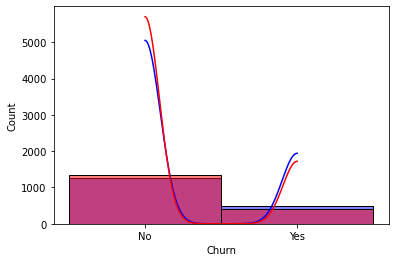

In [92]:
sns.histplot(y_test, color='blue', kde=True)
sns.histplot(y_test_pred, color='red', kde=True)

# Decision Tree Classifier

In [93]:
%%time
from sklearn.tree import DecisionTreeClassifier   #x_train_transformed
regressor = DecisionTreeClassifier()
regressor.fit(X_train_transformed, y_train)

CPU times: total: 62.5 ms
Wall time: 64.5 ms


DecisionTreeClassifier()

In [94]:
y_test_pred = regressor.predict(X_test_transformed)

In [95]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
4880,No,No
1541,No,No
1289,No,No
5745,No,No
4873,No,No


In [96]:
from sklearn.metrics import accuracy_score
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test,y_test_pred)}")

Accuracy of the classifier is: 0.7024417944349801


<AxesSubplot:xlabel='Churn', ylabel='Count'>

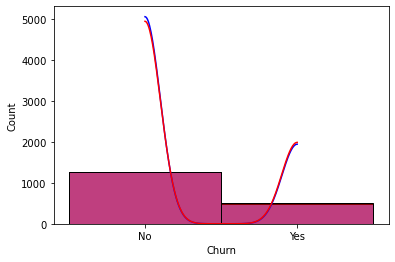

In [97]:
sns.histplot(y_test, color='blue', kde=True)
sns.histplot(y_test_pred, color='red', kde=True)

# KNN Classifier

In [98]:
%%time
from sklearn.neighbors import KNeighborsClassifier     # x_train_transformed
regressor = KNeighborsClassifier()
regressor.fit(X_train_transformed, y_train)

CPU times: total: 15.6 ms
Wall time: 17 ms


KNeighborsClassifier()

In [99]:
y_test_pred = regressor.predict(X_test_transformed)

In [100]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
4880,No,No
1541,No,No
1289,No,No
5745,No,No
4873,No,No


In [101]:
from sklearn.metrics import accuracy_score
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test,y_test_pred)}")

Accuracy of the classifier is: 0.7524134014764339


<AxesSubplot:xlabel='Churn', ylabel='Count'>

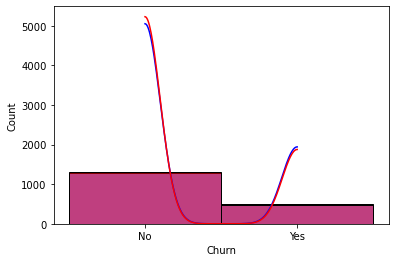

In [102]:
sns.histplot(y_test, color='blue', kde=True)
sns.histplot(y_test_pred, color='red', kde=True)

# SV Classifier

In [103]:
from sklearn.svm import SVC      # x_train_transformed
regressor = SVC()
regressor.fit(X_train_transformed, y_train)

SVC()

In [104]:
y_test_pred = regressor.predict(X_test_transformed)

In [105]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
4880,No,No
1541,No,No
1289,No,No
5745,No,No
4873,No,No


In [106]:
from sklearn.metrics import accuracy_score
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test,y_test_pred)}")

Accuracy of the classifier is: 0.7745599091425327


<AxesSubplot:xlabel='Churn', ylabel='Count'>

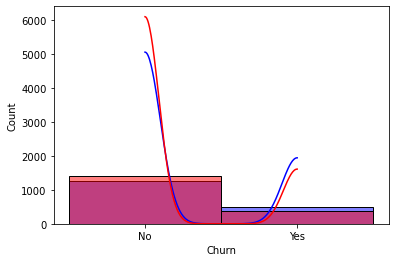

In [107]:
sns.histplot(y_test, color='blue', kde=True)
sns.histplot(y_test_pred, color='red', kde=True)

# Random Forest Classifier

In [108]:
%%time
from sklearn.ensemble import RandomForestClassifier    #x_train_transformed
regressor = RandomForestClassifier()
regressor.fit(X_train_transformed, y_train)

CPU times: total: 641 ms
Wall time: 1.36 s


RandomForestClassifier()

In [109]:
y_test_pred = regressor.predict(X_test_transformed)

In [110]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
4880,No,No
1541,No,No
1289,No,No
5745,No,No
4873,No,No


In [111]:
from sklearn.metrics import accuracy_score
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test,y_test_pred)}")

Accuracy of the classifier is: 0.778534923339012


<AxesSubplot:xlabel='Churn', ylabel='Count'>

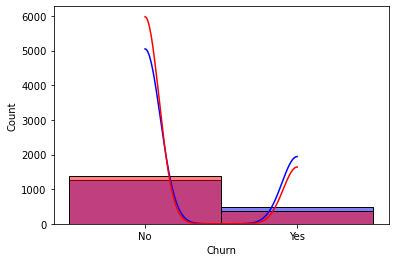

In [112]:
sns.histplot(y_test, color='blue', kde=True)
sns.histplot(y_test_pred, color='red', kde=True)

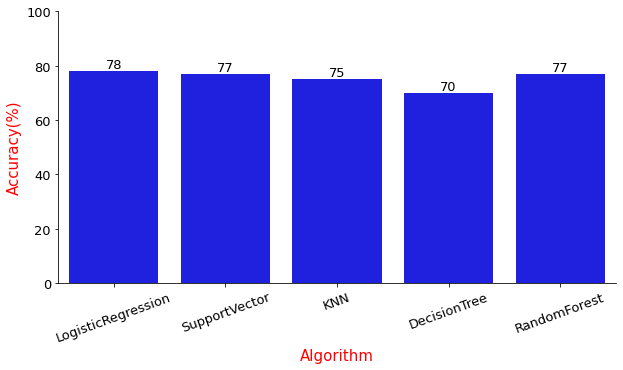

In [121]:
algo=['LogisticRegression','SupportVector','KNN','DecisionTree','RandomForest']
accur=[78,77,75,70,77]

plt.figure(figsize=(10, 5))

p=sns.barplot(y=accur,x=algo,color='b',alpha=True)
p.set_xlabel("Algorithm", fontsize = 15,color='r')
p.set_ylabel("Accuracy(%)", fontsize = 15,color='r')

plt.xticks(rotation = 20)
plt.xticks(size=13)
plt.yticks(size=13)
p.bar_label(p.containers[0],size=13)
plt.ylim(0,100) 

sns.despine()
plt.show()

# Conclusion :

- We achieved about **78%** accuracy on both the test.
- Furthermore, came into the conclusion that the best algorithm to predict customer churn is **Logistic Regression**.